In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
df=pd.read_csv("hpc_breakdowns.csv")
df.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
#df['Sub_metering_1'].value_counts()

In [4]:
df[df['Sub_metering_1']==40].head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
8309,8311,22/12/2006,11:55:00,2.632,0.196,239.19,11.0,40.0,0.0,0.0
11424,11426,24/12/2006,15:50:00,4.806,0.494,242.79,20.0,40.0,27.0,0.0
11425,11427,24/12/2006,15:51:00,4.476,0.308,243.51,18.6,40.0,21.0,0.0
11426,11428,24/12/2006,15:52:00,5.104,0.304,242.65,21.2,40.0,35.0,0.0
11428,11430,24/12/2006,15:54:00,5.148,0.310,243.37,21.2,40.0,35.0,0.0


In [5]:
df.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.047237e+06,2.048803e+06,2.047249e+06,2.047279e+06,2.047983e+06,2.048070e+06,2.049151e+06
mean,1.031496e+06,1.091655e+00,1.237129e-01,2.408405e+02,4.627869e+00,1.122227e+00,1.298954e+00,6.458394e+00
std,5.964586e+05,1.057290e+00,1.127240e-01,3.238838e+00,4.444695e+00,6.153978e+00,5.823372e+00,8.437150e+00
min,0.000000e+00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.162538e+05,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.028638e+06,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.545307e+06,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2.075258e+06,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [6]:
# shape of the DataFrame
df.shape

(2049280, 10)

In [7]:
# Any missing values?
print(df.isnull().values.any())

True


In [8]:
# Total missing values for each feature
print(df.isnull().sum())

Unnamed: 0                  0
Date                        0
Time                        0
Global_active_power      2043
Global_reactive_power     477
Voltage                  2031
Global_intensity         2001
Sub_metering_1           1297
Sub_metering_2           1210
Sub_metering_3            129
dtype: int64


In [9]:
inputs=df.drop(['Unnamed: 0','Date','Time','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1)
inputs.head()

,Global_active_power,Global_reactive_power,Voltage
0,4.216,0.418,234.84
1,5.360,0.436,233.63
2,5.374,0.498,233.29
3,5.388,0.502,233.74
4,3.666,0.528,235.68


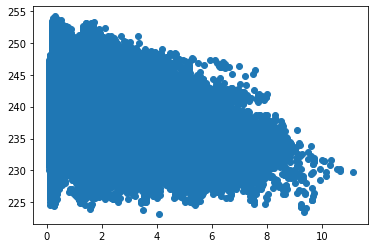

In [10]:
%matplotlib inline
plt.scatter(inputs[['Global_active_power']],inputs.Voltage)

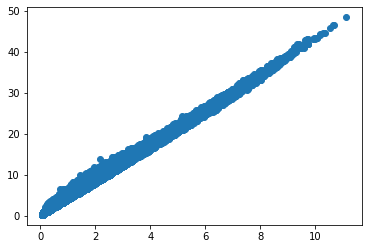

In [11]:
%matplotlib inline
plt.scatter(df[['Global_active_power']],df.Global_intensity)

In [12]:
# Replace using median 
median = inputs['Global_active_power'].median()
inputs['Global_active_power'].fillna(median, inplace=True)

In [13]:
# Replace using median 
median = inputs['Voltage'].median()
inputs['Voltage'].fillna(median, inplace=True)

In [36]:
median

0.1

In [14]:
# Replace using median 
median = inputs['Global_reactive_power'].median()
inputs['Global_reactive_power'].fillna(median, inplace=True)

In [15]:
# Total number of missing values
print(inputs.isnull().sum().sum())

0


In [16]:
# visualize the relationship between the features and the response using scatterplots
#sns.pairplot(inputs, x_vars=['Global_active_power','Global_reactive_power','Voltage'], y_vars='Sub_metering_3', size=7, aspect=0.7)

In [17]:
x=inputs
x.head()

,Global_active_power,Global_reactive_power,Voltage
0,4.216,0.418,234.84
1,5.360,0.436,233.63
2,5.374,0.498,233.29
3,5.388,0.502,233.74
4,3.666,0.528,235.68


In [18]:
# Replace using median 
y= df['Global_intensity'].median()
df['Global_intensity'].fillna(median, inplace=True)

In [19]:
y=df['Global_intensity']
y.head()

0    18.4
1    23.0
2    23.0
3    23.0
4    15.8
Name: Global_intensity, dtype: float64

In [20]:
print(inputs.isnull().sum().sum)

<bound method Series.sum of Global_active_power      0
Global_reactive_power    0
Voltage                  0
dtype: int64>


In [22]:
print(inputs.isnull().sum().sum)

<bound method Series.sum of Global_active_power      0
Global_reactive_power    0
Voltage                  0
dtype: int64>


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [25]:
x.head()

,Global_active_power,Global_reactive_power,Voltage
0,4.216,0.418,234.84
1,5.360,0.436,233.63
2,5.374,0.498,233.29
3,5.388,0.502,233.74
4,3.666,0.528,235.68


In [26]:
len(x_train)

1434496

In [27]:
len(y_train)

1434496

In [28]:
len(x_test)

614784

In [30]:
len(y_test)

614784

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [32]:
model.score(x_train,y_train)

0.995325802024617

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt 
rms=sqrt(mean_squared_error(y_test,prediction))
rms

0.30002520019172907

In [34]:
y_predicted = model.predict(x_test)